In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# import ssl

# ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
confirmedDeaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
confirmedDeaths = confirmedDeaths.drop(axis=1, labels=['Lat', 'Long', 'Province/State'])

In [4]:
groupedDeaths = confirmedDeaths.groupby('Country/Region').sum()

In [5]:
deathsItalyUK = groupedDeaths.loc[['Italy', 'United Kingdom', 'China', 'Spain']].T
deathsItalyUK.index = pd.to_datetime(deathsItalyUK.index, format='%m/%d/%y')

Country/Region,Italy,United Kingdom,China,Spain,Poland
count,61.000000,61.000000,61.000000,61.000000,61.000000
mean,556.704918,18.032787,1903.901639,120.409836,0.737705
std,1232.937256,54.432211,1225.317356,338.125784,1.731104
min,0.000000,0.000000,17.000000,0.000000,0.000000
25%,0.000000,0.000000,633.000000,0.000000,0.000000
50%,1.000000,0.000000,2238.000000,0.000000,0.000000
75%,233.000000,2.000000,3072.000000,10.000000,0.000000
max,5476.000000,282.000000,3265.000000,1772.000000,7.000000


In [8]:
origins = (deathsItalyUK >= 1).idxmax()
daysSinceFirstDeath = pd.DataFrame()
daysSinceFirstDeath['China'] = deathsItalyUK['China']

for county in deathsItalyUK.columns:
    deaths = deathsItalyUK[county].loc[deathsItalyUK.index > origins[county]].values
    daysSinceFirstDeath[county] = np.nan
    daysSinceFirstDeath.iloc[0:len(deaths), daysSinceFirstDeath.columns.get_loc(county)] = deaths

daysSinceFirstDeath = daysSinceFirstDeath.reset_index(drop=True)

In [9]:
deathRateByDate = daysSinceFirstDeath.copy()
deathRateByDate = deathRateByDate.fillna(method='pad')
deathRateByDate.iloc[0:-1] = deathRateByDate.iloc[1:].values - deathRateByDate.iloc[0:-1].values
deathRateByDate.drop(deathRateByDate.tail(1).index,inplace=True)
deathRateByDate = deathRateByDate.replace(0, np.nan).fillna(method='bfill')

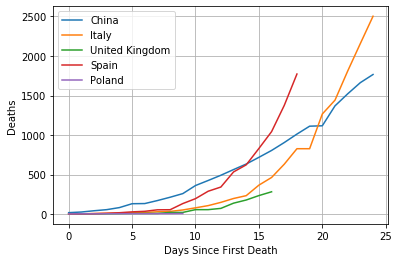

In [12]:
ax = daysSinceFirstDeath.iloc[0:25].plot()
ax.set(xlabel="Days Since First Death", ylabel="Deaths")
ax.grid()
ax.get_figure().savefig('Covid-19 Deaths (Total)- zoomed.png', dpi=600, bbox_inches='tight')

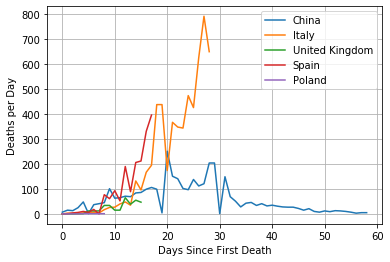

In [13]:
ax = deathRateByDate.plot()
ax.set(xlabel="Days Since First Death", ylabel="Deaths per Day")
ax.grid()
ax.get_figure().savefig('Covid-19 Deaths (Per Day).png', dpi=600, bbox_inches='tight')